In [19]:
!git clone https://github.com/theiresearch/ArcticSeaIce.git

fatal: destination path 'ArcticSeaIce' already exists and is not an empty directory.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('/content/ArcticSeaIce/data/arctic_data.csv')
df

,observation,year,month,date,Extent,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MaxTemperature_NorthSlopeAlaska,AvgTemperature_NorthSlopeAlaska,MinTemperature_NorthSlopeAlaska,GDP_WORLD,ArcticIceVolume
0,1,1980,1,01/01/1980,0.902,0.10,0.080,0.0000,0.02163,0.52800,0.3516,0.2932,0.2115,0.2016,0.1895,0.000000,0.799170
1,2,1980,2,01/02/1980,0.990,0.10,0.264,0.0020,0.02706,0.78602,0.3281,0.3784,0.3101,0.2887,0.2608,0.001349,0.892699
2,3,1980,3,01/03/1980,0.996,0.00,0.454,0.0040,0.04770,0.87686,0.2969,0.1930,0.3068,0.2978,0.2854,0.002698,0.962674
3,4,1980,4,01/04/1980,0.947,0.05,0.649,0.0059,0.05907,0.86664,0.2188,0.3484,0.4042,0.3975,0.3860,0.004047,1.000000
4,5,1980,5,01/05/1980,0.816,0.20,0.851,0.0079,0.06587,0.70773,0.2813,0.3559,0.6390,0.6552,0.6632,0.005395,0.984952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,2020,6,01/06/2020,0.560,0.65,1.000,0.9922,0.99147,0.33332,0.9141,0.5865,0.8793,0.8912,0.8912,0.975144,0.456819
486,487,2020,7,01/07/2020,0.296,1.00,0.914,0.9941,0.96676,0.18343,0.9844,0.5815,0.8904,0.9118,0.9216,0.971002,0.200234
487,488,2020,8,01/08/2020,0.121,0.85,0.713,0.9961,0.94414,0.08410,1.0000,0.5840,0.8760,0.9003,0.9123,0.966859,0.058390
488,489,2020,9,01/09/2020,0.028,0.40,0.517,0.9981,0.92857,0.09857,0.9297,0.6140,0.7154,0.7595,0.7953,0.962716,0.013312


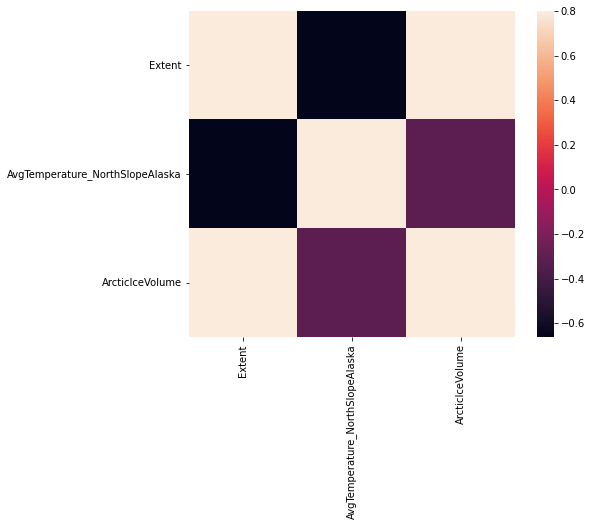

In [21]:
#plot correlation matrix

cor = df.drop( df.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,14,15]], axis=1 )
corrmat = cor.corr()
 
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [22]:
df['V_shift'] = df['ArcticIceVolume'].shift()
df['Volume_vary'] = df['ArcticIceVolume'] - df['V_shift']
del df['V_shift']
df = df.dropna()
df

,observation,year,month,date,Extent,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MaxTemperature_NorthSlopeAlaska,AvgTemperature_NorthSlopeAlaska,MinTemperature_NorthSlopeAlaska,GDP_WORLD,ArcticIceVolume,Volume_vary
1,2,1980,2,01/02/1980,0.990,0.10,0.264,0.0020,0.02706,0.78602,0.3281,0.3784,0.3101,0.2887,0.2608,0.001349,0.892699,0.093529
2,3,1980,3,01/03/1980,0.996,0.00,0.454,0.0040,0.04770,0.87686,0.2969,0.1930,0.3068,0.2978,0.2854,0.002698,0.962674,0.069975
3,4,1980,4,01/04/1980,0.947,0.05,0.649,0.0059,0.05907,0.86664,0.2188,0.3484,0.4042,0.3975,0.3860,0.004047,1.000000,0.037326
4,5,1980,5,01/05/1980,0.816,0.20,0.851,0.0079,0.06587,0.70773,0.2813,0.3559,0.6390,0.6552,0.6632,0.005395,0.984952,-0.015048
5,6,1980,6,01/06/1980,0.689,0.65,1.000,0.0099,0.06389,0.48839,0.2813,0.3233,0.8671,0.8820,0.8842,0.006744,0.894187,-0.090764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,2020,6,01/06/2020,0.560,0.65,1.000,0.9922,0.99147,0.33332,0.9141,0.5865,0.8793,0.8912,0.8912,0.975144,0.456819,-0.164890
486,487,2020,7,01/07/2020,0.296,1.00,0.914,0.9941,0.96676,0.18343,0.9844,0.5815,0.8904,0.9118,0.9216,0.971002,0.200234,-0.256586
487,488,2020,8,01/08/2020,0.121,0.85,0.713,0.9961,0.94414,0.08410,1.0000,0.5840,0.8760,0.9003,0.9123,0.966859,0.058390,-0.141844
488,489,2020,9,01/09/2020,0.028,0.40,0.517,0.9981,0.92857,0.09857,0.9297,0.6140,0.7154,0.7595,0.7953,0.962716,0.013312,-0.045077


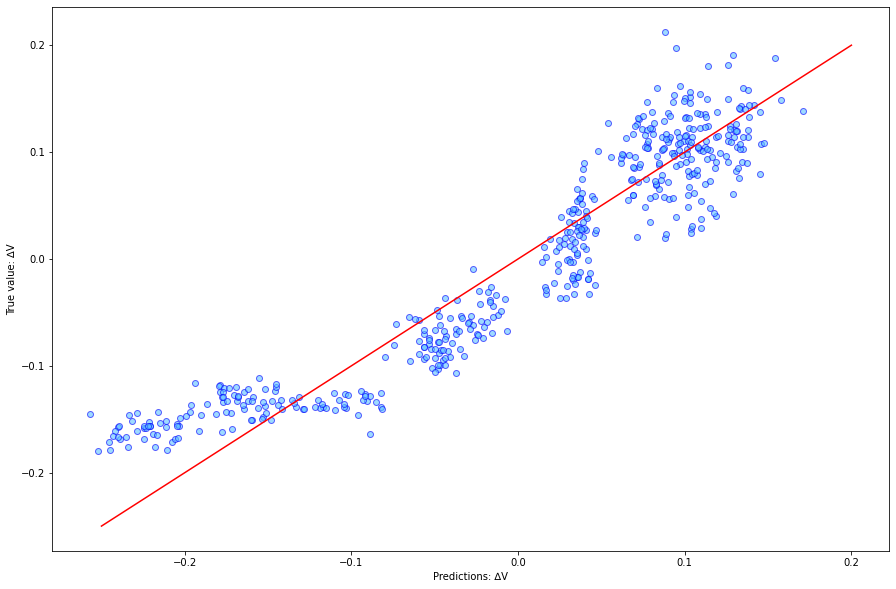

In [26]:
# calculate loss coefficient L

# linear regression
X = df[['AvgTemperature_NorthSlopeAlaska']]
y = df[['Volume_vary']]
regressor = LinearRegression()
regressor.fit(X, y)

col=df.iloc[:,13]
arr=col.values

# plot setting
plt.figure(figsize = (15,10))

#plt.scatter(X, y, color = 'red')
#plt.plot(arr, regressor.predict(X), color = 'blue')
plt.plot([-0.25, 0.2], [-0.25, 0.2], c='red', zorder=1)
plt.scatter(y, regressor.predict(X), alpha=0.6, edgecolors='blue', c='#5EC2FF')

plt.xlabel('Predictions: ∆V')
plt.ylabel('True value: ∆V')
plt.show()

In [24]:
print('R^2 value:',round(regressor.score(X,y),3))

R^2 value: 0.881


In [25]:
print('MSE:',round(mean_squared_error(regressor.predict(X),y),5))

MSE: 0.00153
